In [8]:

df <- read.csv("C:/Users/radha31/Downloads/Marks.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

print(str(df))

'data.frame':	100 obs. of  3 variables:
 $ exam_1  : num  34.6 30.3 35.8 60.2 79 ...
 $ exam_2  : num  78 43.9 72.9 86.3 75.3 ...
 $ admitted: int  0 0 0 1 1 0 1 1 1 1 ...
NULL


In [9]:
# Create Training and Test data -
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(df), 0.8*nrow(df))  # row indices for training data
trainingData <- data[trainingRowIndex, ]  # model training data
testData  <- data[-trainingRowIndex, ]   # test data

In [10]:
#logistic regression model
model <- glm (admitted ~ ., data = trainingData, family = binomial)
summary(model)


Call:
glm(formula = admitted ~ ., family = binomial, data = trainingData)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.18789  -0.23090   0.02051   0.27290   1.67564  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -22.77691    5.74852  -3.962 7.43e-05 ***
exam_1        0.18894    0.04894   3.861 0.000113 ***
exam_2        0.18215    0.04739   3.843 0.000121 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 108.441  on 79  degrees of freedom
Residual deviance:  37.737  on 77  degrees of freedom
AIC: 43.737

Number of Fisher Scoring iterations: 7


In [11]:
predict <- predict(model, type = 'response')

In [12]:
#confusion matrix
table(trainingData$admitted, predict > 0.5)

   
    FALSE TRUE
  0    28    5
  1     5   42

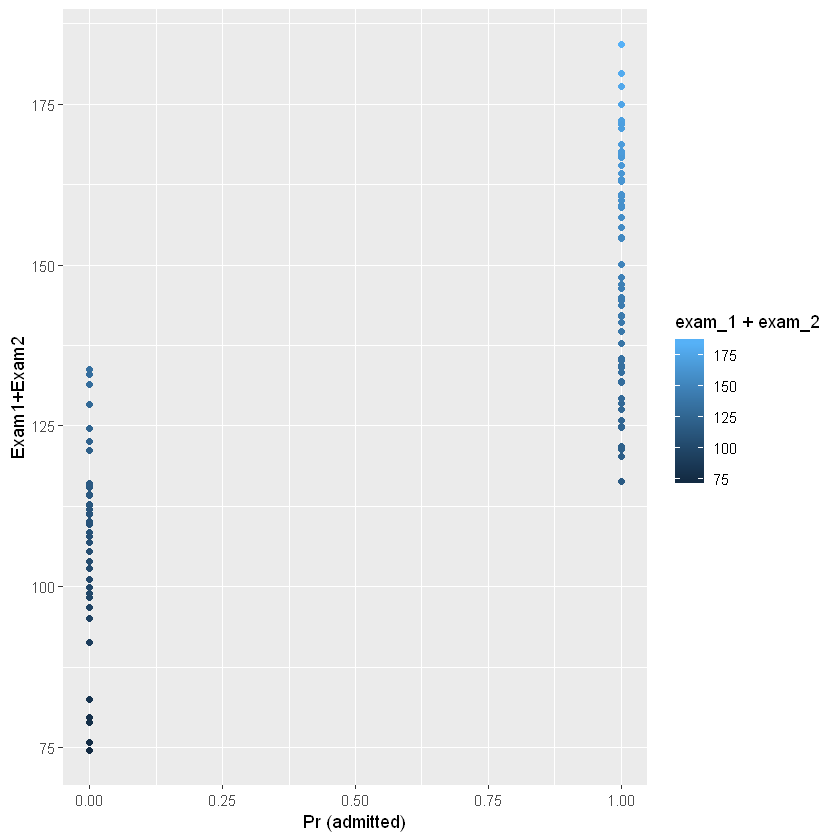

In [36]:
#ROCR Curve
#plot glm
library("ggplot2")
pl <- ggplot(data, aes(data$admitted, as.numeric(exam_1+exam_2),
                       color=exam_1+exam_2)) +
  
  geom_point(position=position_jitter(height=0.5, width=0)) +
  
  xlab("Pr (admitted)") + ylab("Exam1+Exam2")

print(pl)

Warning message:
"Ignoring unknown parameters: family"

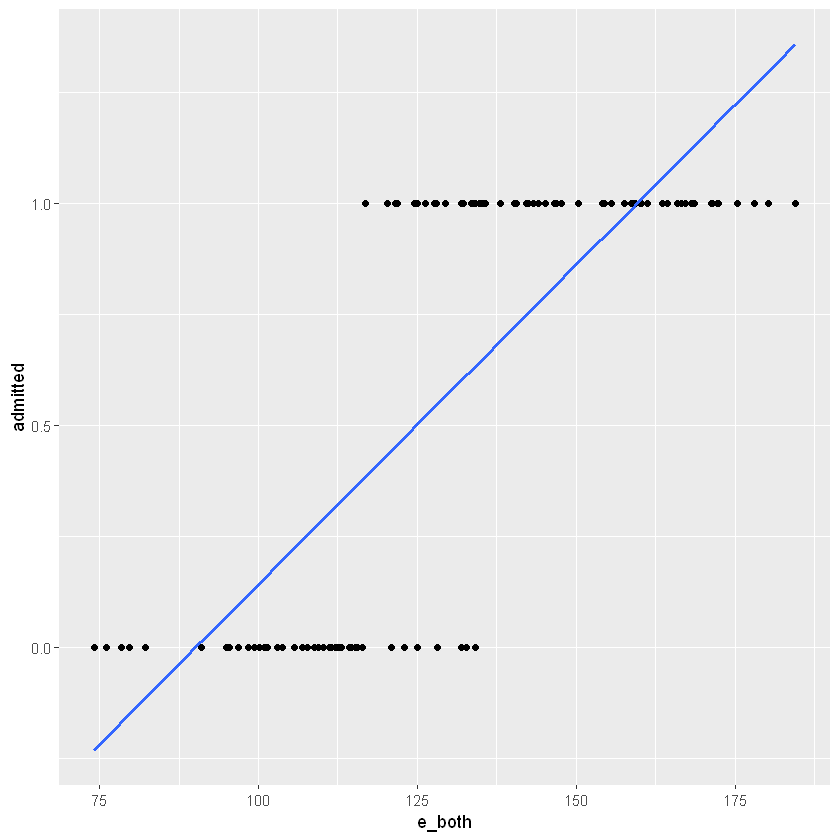

In [41]:
e_both = data$exam_1+data$exam_2

ggplot(data, aes(x=e_both, y=admitted)) + geom_point() + 
stat_smooth(method="glm", family="binomial", se=FALSE)

exam_1   exam_2 
3.870382 3.870382

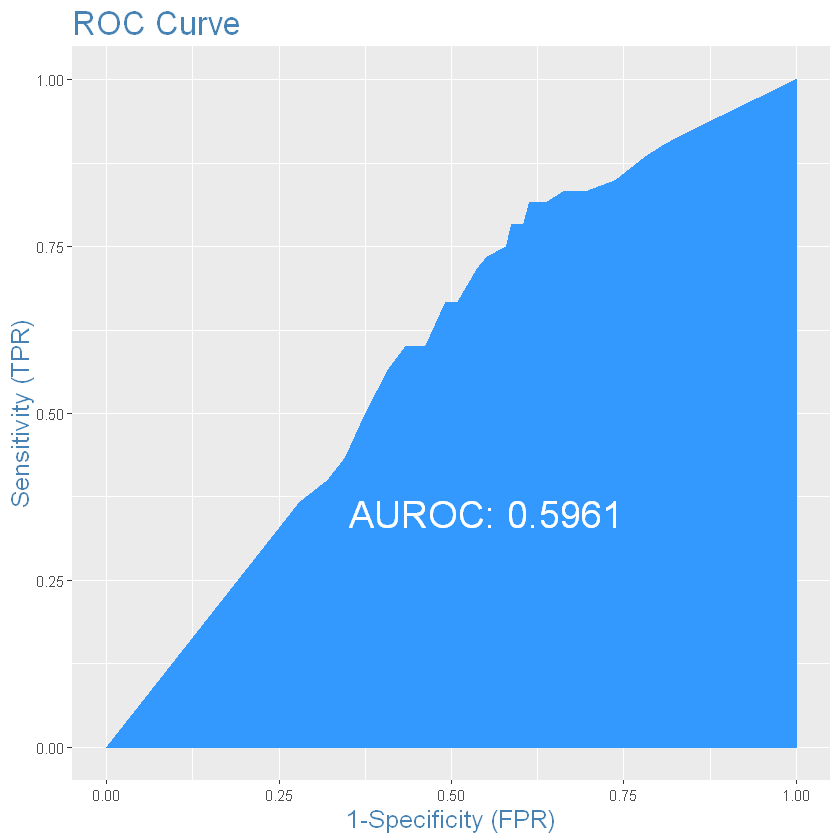

In [47]:
library(car)
vif(model)
options(warn=-1)
library(InformationValue)
plotROC(data, predict)